**Module import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

**Import info**

In [2]:
hipc_df = pd.read_csv("./Data/hipc_df.csv")
N = len(hipc_df)
labels = hipc_df['Label'].to_numpy()
patient_labels =  hipc_df['Patient'].to_numpy()
labs_labels = hipc_df["Lab"].to_numpy()
nb_clusters = 64

**Visuals**

In [3]:
labs = ["W2", "D54", "FTV", "IU", "O0", "pw", "pM"]
markers = ['.', '^', '<', 's', '*', 'P', 'd']

patient1 = mpatches.Patch(color='blue', label='Patient 1')
patient2 = mpatches.Patch(color='red', label='Patient 2')
patient3 = mpatches.Patch(color='green', label='Patient 3')
handles = [patient1, patient2, patient3]
for i in range(len(markers)) :
    handles.append(Line2D([0], [0], label=labs[i], marker=markers[i], markersize=5,  linestyle=''))

colors_dict={"1" : 'blue',
"2" : 'red', 
"3" : 'green'}

markers_dict = dict(zip(labs, markers))

# OT linearisation on K-means

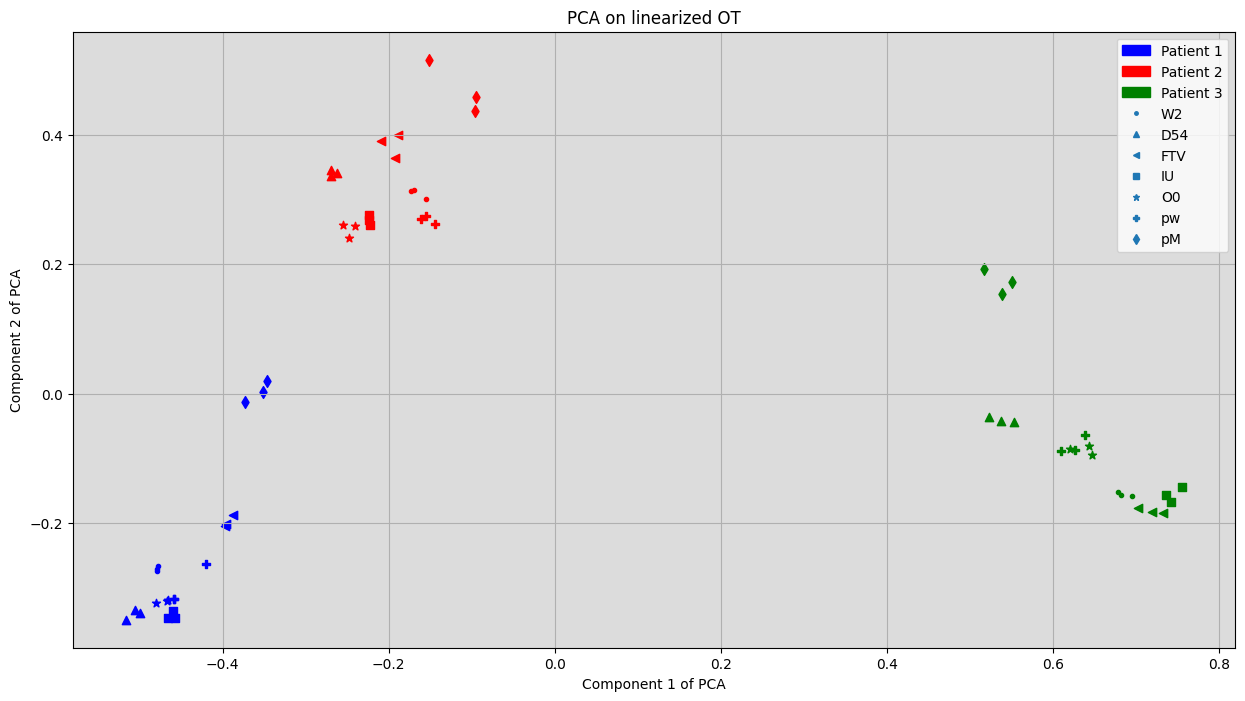

In [4]:
pca_linW2 = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(nb_clusters)+".npy")

fig, ax = plt.subplots(figsize=(15,8), nrows = 1, ncols = 1)

for i in range(N) :
    ax.scatter(pca_linW2[i,0], pca_linW2[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax.grid()
ax.set_facecolor("gainsboro")
ax.legend(handles=handles)
ax.set_ylabel("Component 2 of PCA")
ax.set_xlabel("Component 1 of PCA")
ax.set_title("PCA on linearized OT")
plt.savefig("./Results/images/PCA_linW2_KMeans.png")

# OT linearisation on FlowSOM

Text(0.5, 0, 'Component 1 of PCA')

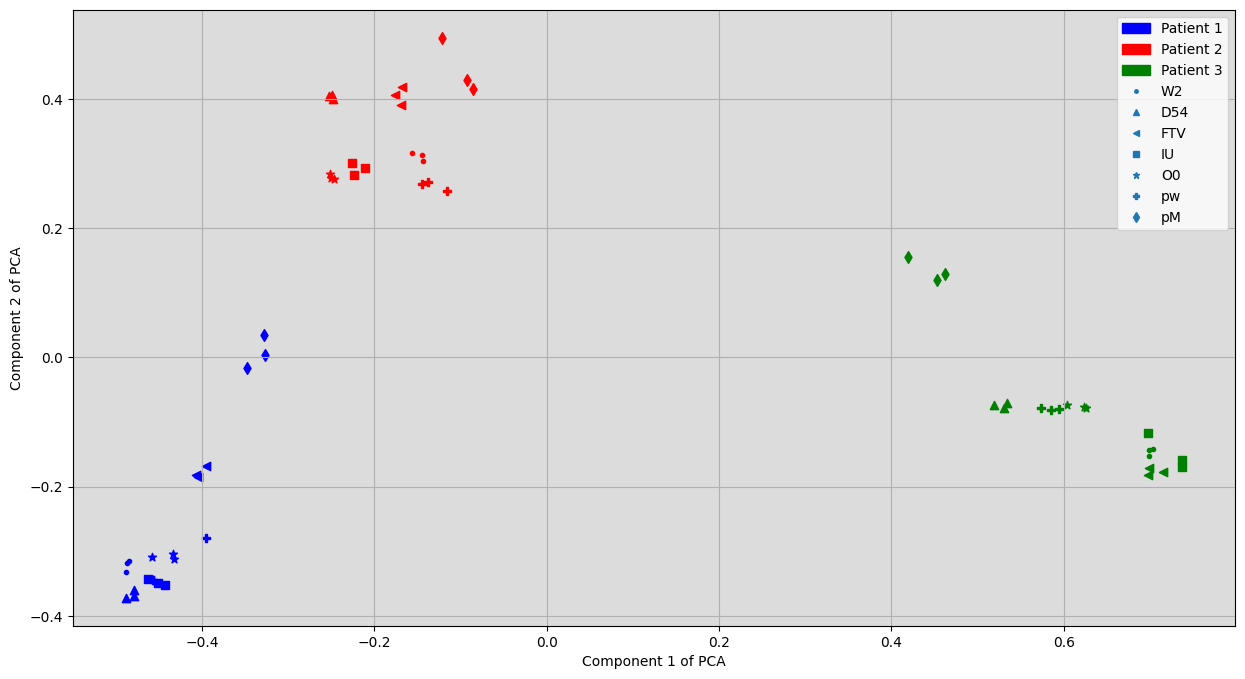

In [5]:
pca_linW2 = np.load("./Results/PCA/pca_linW2_W2bary_flowsom_K"+str(nb_clusters)+".npy")

fig, ax = plt.subplots(figsize=(15,8), nrows = 1, ncols = 1)

for i in range(N) :
    ax.scatter(pca_linW2[i,0], pca_linW2[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax.grid()
ax.set_facecolor("gainsboro")
ax.legend(handles=handles)
ax.set_ylabel("Component 2 of PCA")
ax.set_xlabel("Component 1 of PCA")
#ax.set_title("PCA on linearized OT")

# Compositional of K-means

Text(0.5, 1.0, 'PCA on compositional data of K-means')

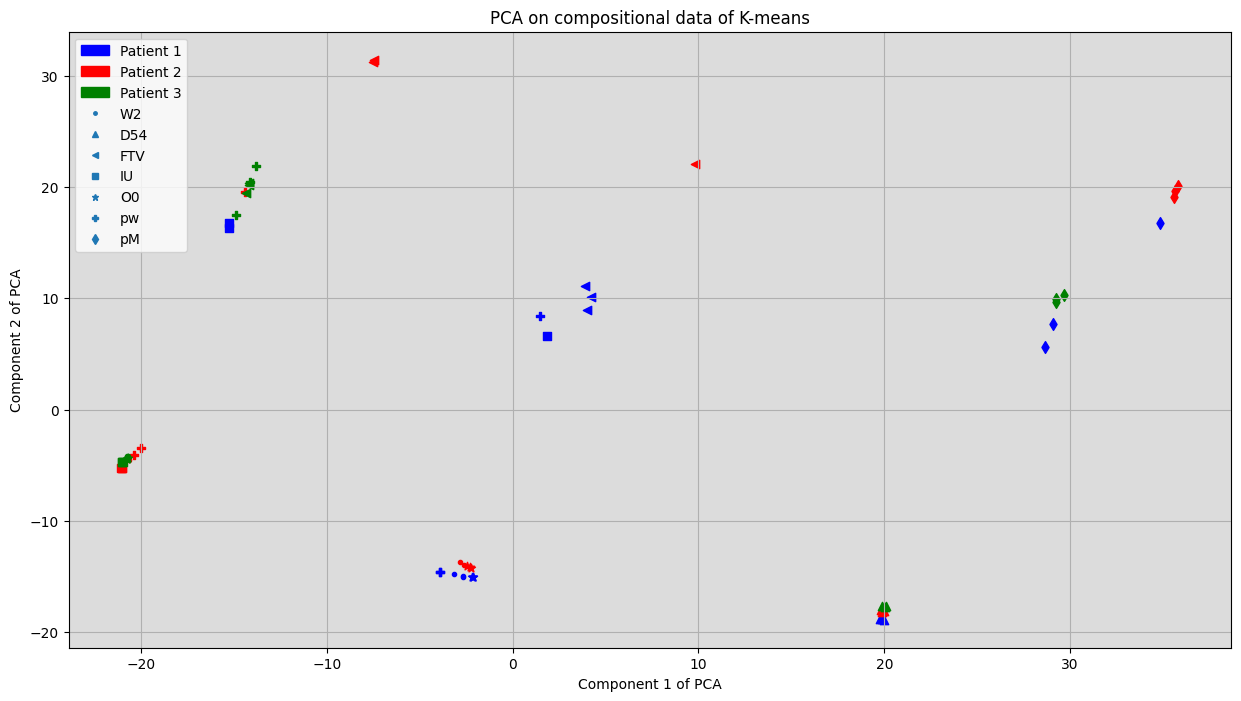

In [6]:
pca_weights = np.load("./Results/PCA/pca_weights_lr_Kmeans_K"+str(nb_clusters)+".npy")

fig, ax = plt.subplots(figsize=(15,8), nrows = 1, ncols = 1)

for i in range(N) :
    ax.scatter(pca_weights[i,0], pca_weights[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax.grid()
ax.set_facecolor("gainsboro")
ax.legend(handles=handles)
ax.set_ylabel("Component 2 of PCA")
ax.set_xlabel("Component 1 of PCA")
ax.set_title("PCA on compositional data of K-means")

# KME

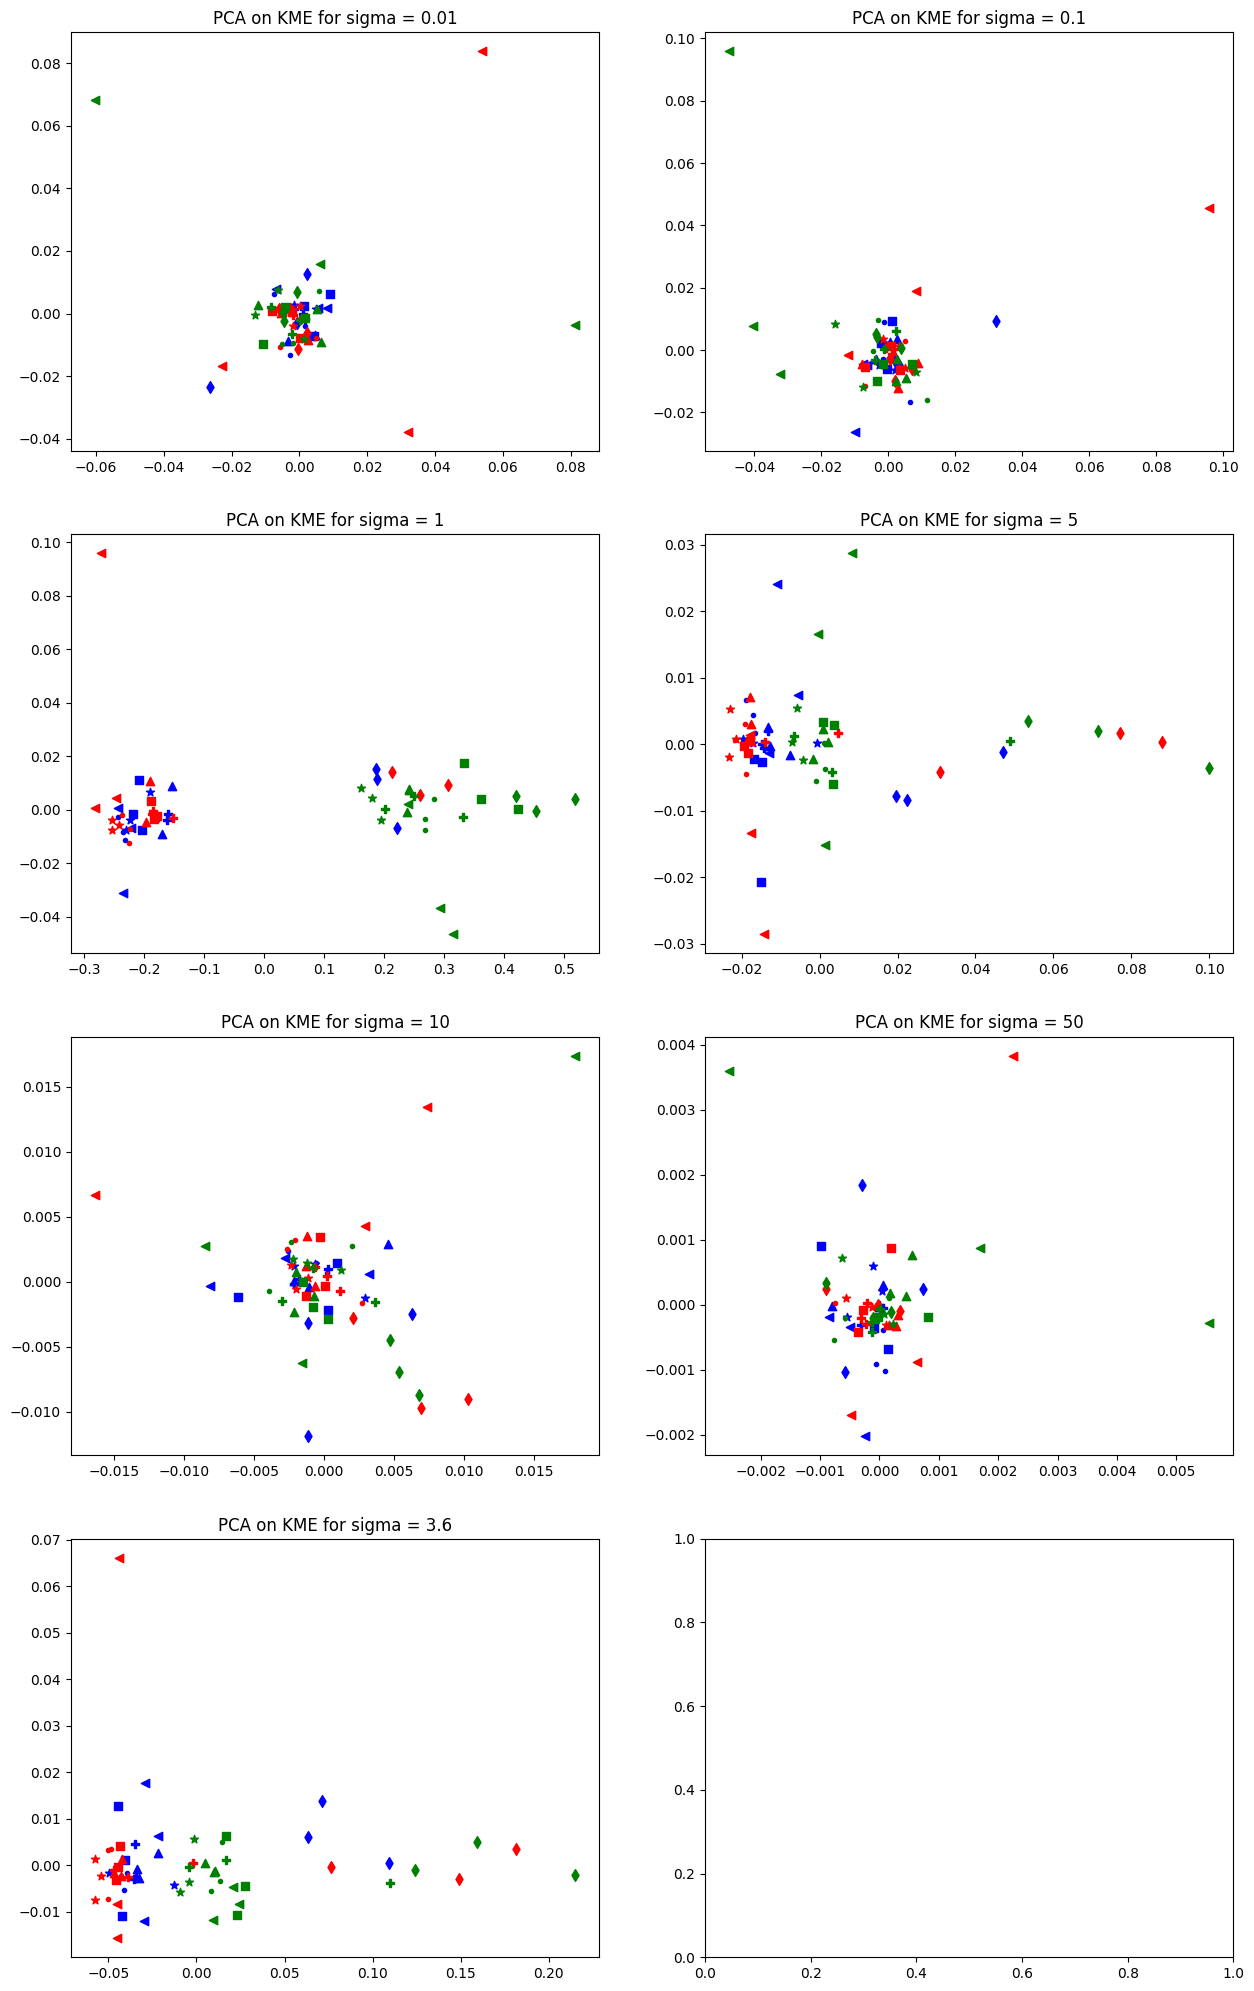

In [7]:
s = 7*64

fig, ax = plt.subplots(figsize=(15,25), nrows = 4, ncols = 2)

for j,sigma in enumerate([0.01,0.1,1,5,10,50,3.6]) :
    pca_kme = np.load("./Results/PCA/pca_kme_s"+str(s)+"_sigma"+str(sigma)+".npy")
    for i in range(N) :
        ax[j//2][j%2].scatter(pca_kme[i,0], pca_kme[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
       
    ax[j//2][j%2].set_title("PCA on KME for sigma = "+str(sigma))

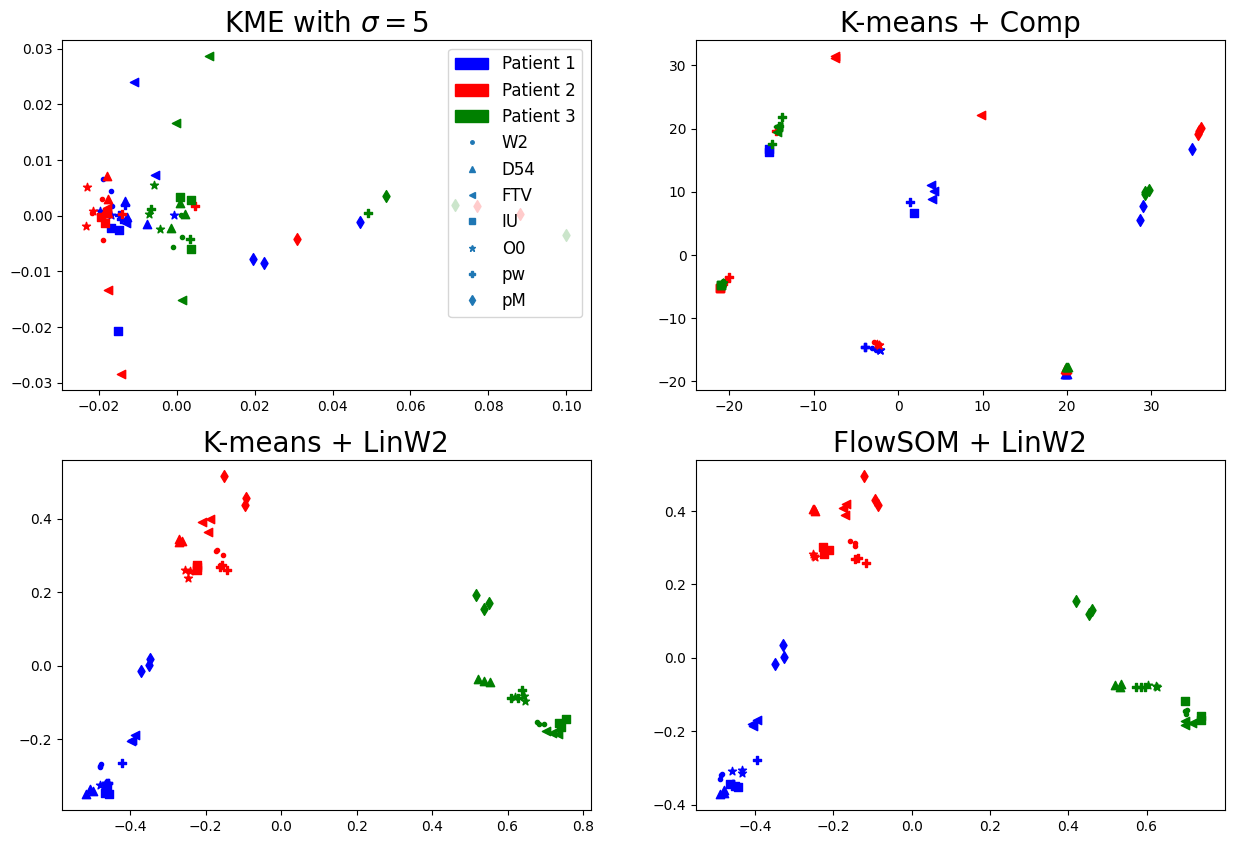

In [9]:


fig, ax = plt.subplots(figsize=(15,10), nrows = 2, ncols = 2)

s = 7*64
sigma = 5
pca_kme = np.load("./Results/PCA/pca_kme_s"+str(s)+"_sigma"+str(sigma)+".npy")
for i in range(N) :
    ax[0][0].scatter(pca_kme[i,0], pca_kme[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax[0][0].set_title("KME with $\sigma = $"+str(sigma), fontsize=20)

ax[0][0].legend(handles=handles, prop={'size': 12})

nb_clusters = 64
pca_comp = np.load("./Results/PCA/pca_weights_lr_Kmeans_K"+str(nb_clusters)+".npy")
for i in range(N) :
    ax[0][1].scatter(pca_comp[i,0], pca_comp[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax[0][1].set_title("K-means + Comp", fontsize=20)

pca_linW2_Kmeans = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(nb_clusters)+".npy")
for i in range(N) :
    ax[1][0].scatter(pca_linW2_Kmeans[i,0], pca_linW2_Kmeans[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax[1][0].set_title("K-means + LinW2", fontsize=20)

pca_linW2_fsom = np.load("./Results/PCA/pca_linW2_W2bary_flowsom_K"+str(nb_clusters)+".npy")
for i in range(N) :
    ax[1][1].scatter(pca_linW2_fsom[i,0], pca_linW2_fsom[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
ax[1][1].set_title("FlowSOM + LinW2", fontsize=20)

plt.savefig("./Results/images/PCA_comparison.png")